<a href="https://colab.research.google.com/github/Naman-Kapoor26/BALL-BEARING-FAULT-DETECTION/blob/main/Image_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importing dependencies
import os
from matplotlib import pyplot as plt
import scipy.io
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [36]:
#Setting up github directory for this project in jupyter environment

!git clone https://github.com/Naman-Kapoor26/BALL-BEARING-FAULT-DETECTION.git

fatal: destination path 'BALL-BEARING-FAULT-DETECTION' already exists and is not an empty directory.


In [37]:
subdir_path = '/content/BALL-BEARING-FAULT-DETECTION/DATA' 

In [38]:
#We can have irregularities in keys for some files
display=10
for file_name in os.listdir(subdir_path):
  if display<=0:
    break

  file_path=subdir_path+'/'+file_name
  if file_path.endswith('.mat'):
    display-=1
    print(file_name+' has '+str(scipy.io.loadmat(file_path).keys()))

O21_1.mat has dict_keys(['__header__', '__version__', '__globals__', 'X235_DE_time', 'X235_FE_time', 'X235_BA_time', 'X235RPM'])
B28_2.mat has dict_keys(['__header__', '__version__', '__globals__', 'X050_DE_time'])
O7_3.mat has dict_keys(['__header__', '__version__', '__globals__', 'X133_DE_time', 'X133_FE_time', 'X133_BA_time', 'X133RPM'])
B21_0.mat has dict_keys(['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM'])
I28_2.mat has dict_keys(['__header__', '__version__', '__globals__', 'X058_DE_time'])
I14_1.mat has dict_keys(['__header__', '__version__', '__globals__', 'X170_DE_time', 'X170_FE_time', 'X170_BA_time', 'X170RPM'])
O21_3.mat has dict_keys(['__header__', '__version__', '__globals__', 'X237_DE_time', 'X237_FE_time', 'X237_BA_time', 'X237RPM'])
I21_2.mat has dict_keys(['__header__', '__version__', '__globals__', 'X211_DE_time', 'X211_FE_time', 'X211_BA_time', 'X211RPM'])
B28_0.mat has dict_keys(['__header__', '__version__', '

In [39]:
#We will take data from both ends for our analysis.
#Difference between vibrational patterns on both ends provides more info about fault location

file_path='/content/BALL-BEARING-FAULT-DETECTION/DATA/O21_1.mat'
file_data=scipy.io.loadmat(file_path)
for key in file_data.keys():
  if 'DE' in key:
    print(key+' number of readings : '+str(len(file_data[key])))
    print(file_data[key][0:10])
    print('')
  if 'FE' in key:
    print(key+' number of readings : '+str(len(file_data[key])))
    print(file_data[key][0:10])
  
  

X235_DE_time number of readings : 121991
[[-0.02598962]
 [-0.02720788]
 [-0.04791836]
 [ 0.03776617]
 [-0.04385749]
 [-0.06822275]
 [-0.00852784]
 [-0.02233483]
 [-0.00365479]
 [-0.02152265]]

X235_FE_time number of readings : 121991
[[ 0.00349273]
 [ 0.04725455]
 [ 0.02835273]
 [-0.08382545]
 [-0.01664182]
 [ 0.00369818]
 [-0.04355636]
 [-0.03307818]
 [ 0.06286909]
 [ 0.06081455]]


In [40]:
#Helper class to store/retrieve the vibrational data
class ballBearing:
    def __init__(self, fault_loc, file_data):
        self.fault_type = fault_loc 

        keys = file_data.keys()
        self.DE,self.FE='None','None' #initialize end signals
        for key in keys:
            if 'DE' in key:
                self.DE = file_data[key] 
            if 'FE' in key:
                self.FE = file_data[key]

In [59]:
#Loading in .mat files from directory and storing data within our helper class
data=[]
motor_hp=[0,1,2,3]
#No Fault
numNormalFiles=len(motor_hp)
print('Fault type : Normal')
for hp in motor_hp:
    file_name = 'N' + '_'+ str(hp) + '.mat'
    print(file_name)
    file_path=subdir_path+'/'+file_name
    file_data = scipy.io.loadmat(file_path)
    data.append(ballBearing('Normal', file_data))
print('\n')


#Faults
fault_type=["Normal"]
fault_location = ['Ball', 'Inner Ring','Outer Ring']
fault_sizes = ['7','14','21']
numFaultFiles=len(motor_hp)*len(fault_sizes)
for loc in fault_location:
    print("Fault type : "+loc)
    for size in fault_sizes:
        fault_type.append(loc+size)
        for hp in motor_hp:
            file_name= loc[0]+size+'_'+str(hp) + '.mat'
            print(file_name)
            file_path=subdir_path+'/'+file_name
            file_data = scipy.io.loadmat(file_path)
            
            data.append(ballBearing(loc+size, file_data))
            
    print('\n')


Fault type : Normal
N_0.mat
N_1.mat
N_2.mat
N_3.mat


Fault type : Ball
B7_0.mat
B7_1.mat
B7_2.mat
B7_3.mat
B14_0.mat
B14_1.mat
B14_2.mat
B14_3.mat
B21_0.mat
B21_1.mat
B21_2.mat
B21_3.mat


Fault type : Inner Ring
I7_0.mat
I7_1.mat
I7_2.mat
I7_3.mat
I14_0.mat
I14_1.mat
I14_2.mat
I14_3.mat
I21_0.mat
I21_1.mat
I21_2.mat
I21_3.mat


Fault type : Outer Ring
O7_0.mat
O7_1.mat
O7_2.mat
O7_3.mat
O14_0.mat
O14_1.mat
O14_2.mat
O14_3.mat
O21_0.mat
O21_1.mat
O21_2.mat
O21_3.mat




In [60]:
len(fault_type)

10

12


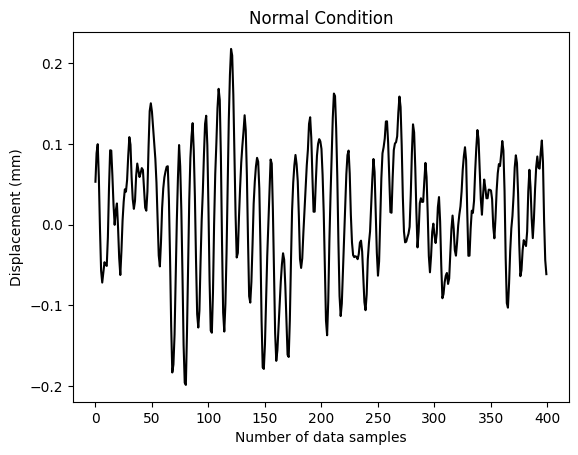

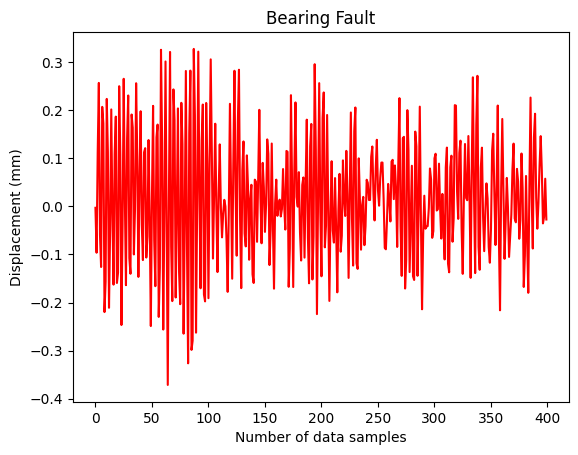

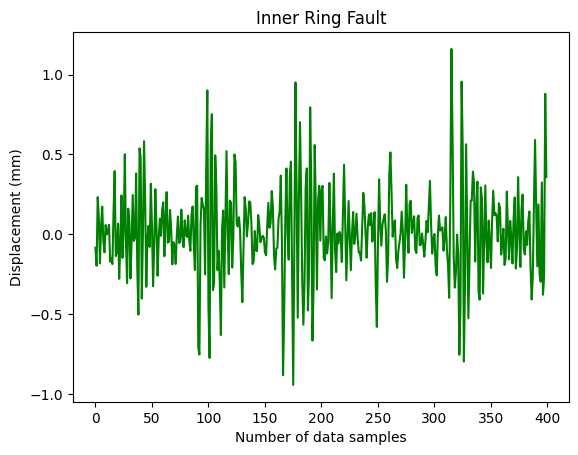

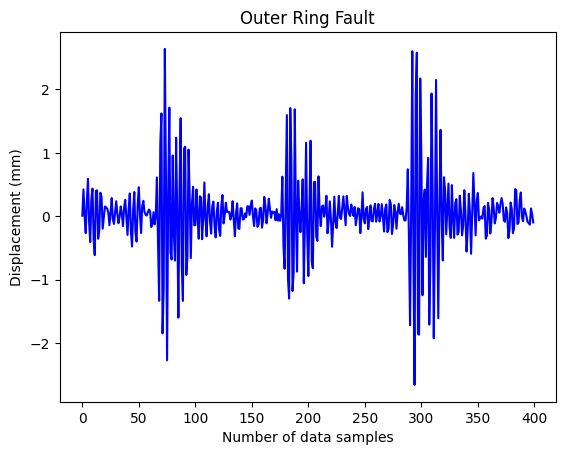

In [44]:
#Plotting 1D signals 
plt.plot(data[0].DE[0:400],c='k')
plt.title("Normal Condition")
plt.xlabel("Number of data samples")
plt.ylabel("Displacement (mm)")
plt.show()
plt.plot(data[numNormalFiles].DE[0:400],c='r')
plt.title("Bearing Fault")
plt.xlabel("Number of data samples")
plt.ylabel("Displacement (mm)")
plt.show()
plt.plot(data[numNormalFiles+1*numFaultFiles].DE[0:400],c='g')
plt.title("Inner Ring Fault")
plt.xlabel("Number of data samples")
plt.ylabel("Displacement (mm)")
plt.show()
plt.plot(data[numNormalFiles+2*numFaultFiles].DE[0:400],c='b')
plt.title("Outer Ring Fault")
plt.xlabel("Number of data samples")
plt.ylabel("Displacement (mm)")
plt.show()

In [45]:
#Image generation from a slice of vibrational array
def vibration_image(vi_signal):
    side_length = round(np.sqrt(len(vi_signal))) 
    
    vi_signal -= np.min(vi_signal) #Zero Centering 
      
    vi_signal = 2*vi_signal/np.max(vi_signal) # Normalize to [0, 2] 

    side_length = int(side_length)

    img = np.zeros((side_length, side_length)) #Initializing a 2d array

    for row in range(side_length):
      img[row] = vi_signal[row*side_length : row*side_length+side_length].reshape(-1) #Flattening row
       
    return img

In [72]:
images_count=[0]*len(fault_type)
imgs = []
total_size = 64*64 #image size


for d in data: 

  #Drive End Signal Conversion
    if d.DE !='None':
      signal = d.DE
      used_data = 0
      while used_data + total_size < len(signal):
          images_count[fault_type.index(d.fault_type)]+=1 
          img = vibration_image(signal[used_data:used_data + total_size])
          imgs.append(img)
          used_data += total_size #update number of remaining signal samples

  #Fan End Signal Conversion
    if d.FE !='None':
      #image_count[fault_type.index(d.fault_type)]+=1   
      signal = d.FE
      used_data = 0
      while used_data + total_size < len(signal):
          images_count[fault_type.index(d.fault_type)]+=1
          img = vibration_image(signal[used_data:used_data + total_size])
          imgs.append(img)
          used_data += total_size
    


In [85]:
print("Total images "+str(sum(image_count))+"\n")
for i in range(len(fault_type)):
  print(fault_type[i]+" images : "+str(images_count[i]))



Total images 2916

Normal images : 826
Ball7 images : 232
Ball14 images : 232
Ball21 images : 232
Inner Ring7 images : 234
Inner Ring14 images : 232
Inner Ring21 images : 232
Outer Ring7 images : 232
Outer Ring14 images : 232
Outer Ring21 images : 232


In [98]:
#Saving image partitions for each fault 
from numpy import save
init_count=0

for i in range(len(fault_type)):
  imgs_array=np.float32(imgs[init_count:init_count+images_count[i]])
  save(fault_type[i]+'.npy',imgs_array) 
  init_count+=image_count[i]

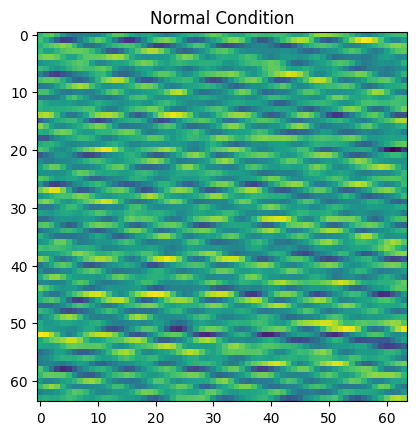

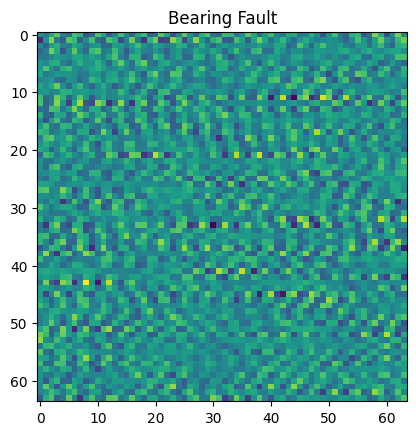

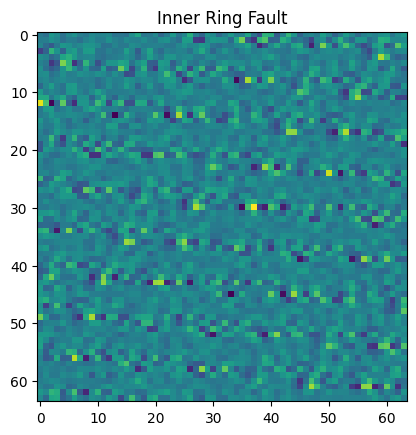

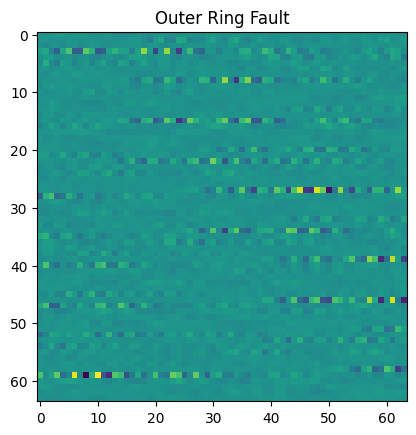

In [102]:
#Plotting image signals
plt.title("Normal Condition")
plt.imshow(imgs[0])
plt.show()

plt.title("Bearing Fault")
plt.imshow(imgs[image_count[0]])
plt.show()

plt.title("Inner Ring Fault")
plt.imshow(imgs[sum(image_count[0:4])])
plt.show()

plt.title("Outer Ring Fault")
plt.imshow(imgs[sum(image_count[0:9])])
plt.show()
